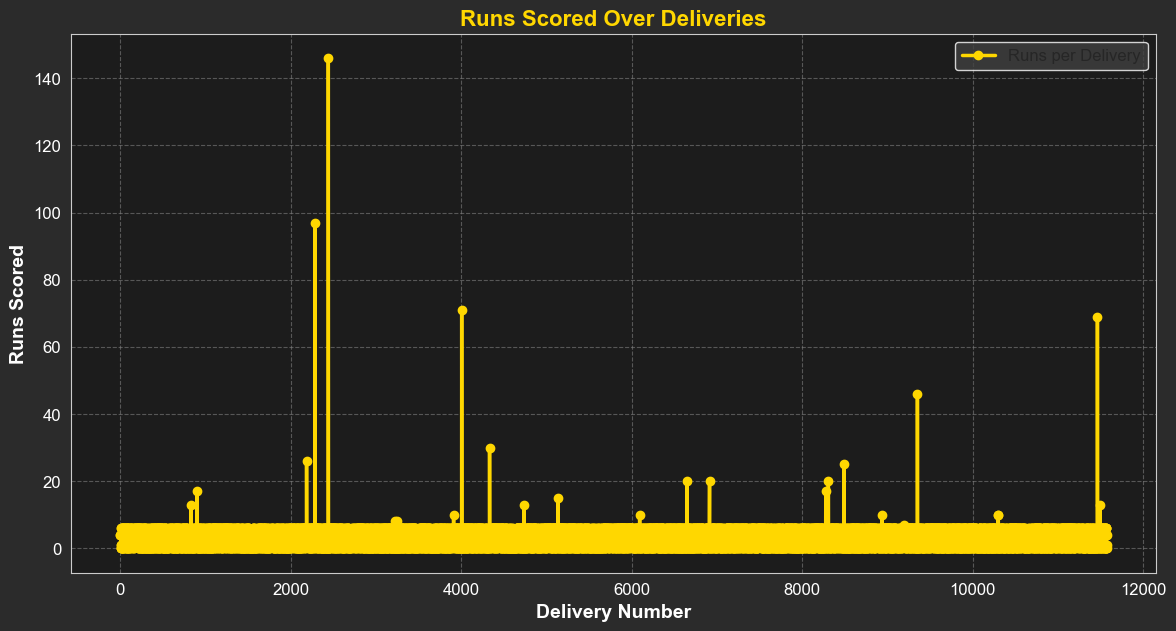

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "IPL_Match_Highlights_Commentary.csv"
df = pd.read_csv(file_path)
def extract_bowler_batter(commentary):
    match = re.search(r"(\w+) to (\w+)", commentary)
    return match.groups() if match else (None, None)
def extract_ball_type(commentary):
    keywords = ["bouncer", "full toss", "length ball", "yorker", "short ball"]
    return next((ball for ball in keywords if ball in commentary.lower()), "unknown")
def extract_shot_type(commentary):
    if "boundary" in commentary.lower() or "FOUR" in commentary:
        return "Boundary"
    if "SIX" in commentary:
        return "Six"
    if "single" in commentary.lower():
        return "Single"
    return "Other"
def extract_speed(commentary):
    match = re.search(r"(\d+)\s?km/h", commentary)
    return int(match.group(1)) if match else None
def extract_runs(commentary):
    if "FOUR" in commentary:
        return 4
    if "SIX" in commentary:
        return 6
    if "single" in commentary.lower():
        return 1
    match = re.search(r"(\d+)\s*runs?", commentary)
    return int(match.group(1)) if match else 0
df["Bowler"], df["Batter"] = zip(*df["Commentary"].apply(extract_bowler_batter))
df["Ball Type"] = df["Commentary"].apply(extract_ball_type)
df["Shot Type"] = df["Commentary"].apply(extract_shot_type)
df["Speed (km/h)"] = df["Commentary"].apply(extract_speed)
df["Runs Scored"] = df["Commentary"].apply(extract_runs)
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.figure(figsize=(14, 7), facecolor="#2b2b2b")
plt.plot(df.index, df["Runs Scored"], marker='o', linestyle='-', color='#FFD700', linewidth=2.5, label="Runs per Delivery")
plt.xlabel("Delivery Number", fontsize=14, fontweight='bold', color='#ffffff')
plt.ylabel("Runs Scored", fontsize=14, fontweight='bold', color='#ffffff')
plt.title("Runs Scored Over Deliveries", fontsize=16, fontweight='bold', color='#FFD700')
plt.legend(fontsize=12, facecolor="#404040", edgecolor="white")
plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.6, color="gray")
plt.xticks(fontsize=12, color='#ffffff')
plt.yticks(fontsize=12, color='#ffffff')
plt.gca().set_facecolor("#1c1c1c")
plt.show()
